**Lab5 - Tổng hợp** 

In [40]:
#Cho tập dữ liệu Wine Quality red
#Câu 1: Đọc đữ liệu, sau đó hiển thị 5 dòng đầu điên, thông tin về dữ liệu,  thống kê mô tả
#Câu 2: Phân tích khám phá dữ liệu
# 2.1: Kiểm tra giá trị thiếu (Null)
# 2.2: Vẽ histogram cho tất cả các biến và nhận xét 
# 2.3: Vẽ boxplot cho tất cả các biens và nhận xét
# 2.4: Vẽ Scatterplot cho "alcohol" và "quality"
#Câu 3: tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
#Câu 4: Chia tập dữ liệu thủ công không dùng thư viện có sẵn
# 4.1: Xào trộn dữ liệu
# 4.2: Chia dữ liệu với 80% huấn luyện
# 4.3: Tách dữ liệu
# 4.4: Tách đặc trưng và nhãn
#Câu 5: chuẩn bị dữ liệu
# 5.1: khởi tạo bộ dữ liệu chuẩn hóa
# 5.2: chuẩn hóa huấn luyện
# 5.3: chuẩn hóa kiểm tra
#Câu 6: ứng dụng mô hình hồi quy tuyến tính
# 6.1: khởi tạo
# 6.2: huấn luyện
# 6.3: dự đoán trên tập kiểm tra 
#Câu 7: đánh giá mô hình
#Tính MSE và R^2

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("winequality-red.csv", sep=";")
#hiển thị 5 dòng đầu tiên
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
#thông tin về dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
#thống kê mô tả
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [45]:
#Câu 2: 2.1: Kiểm tra giá trị thiếu (Null)
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

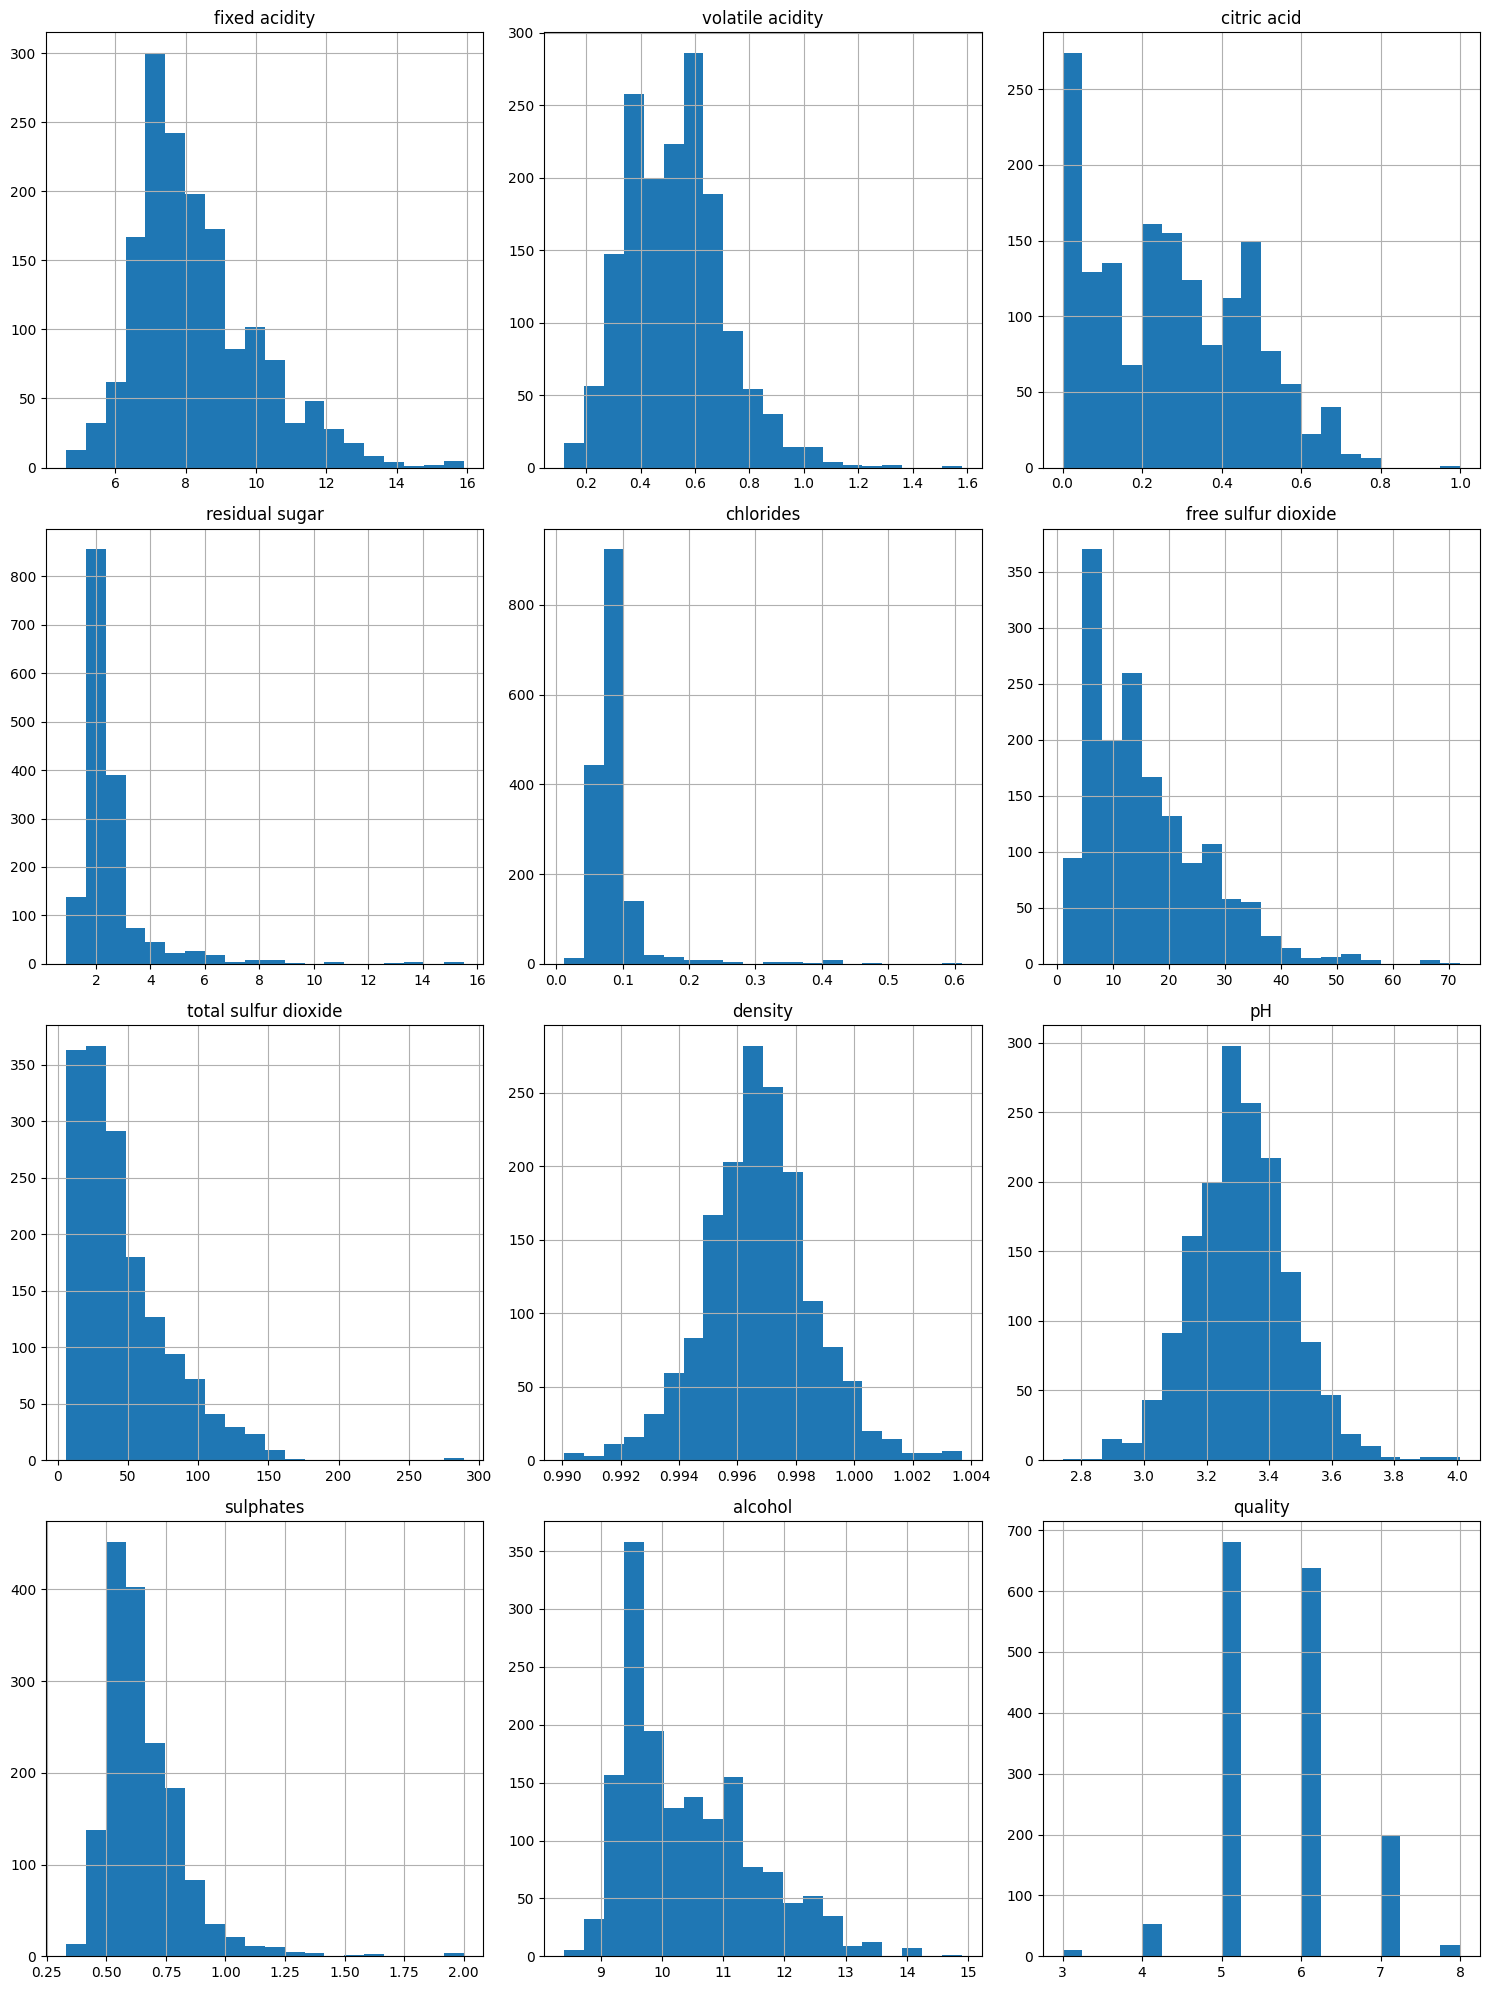

In [46]:
# 2.2: Vẽ histogram cho tất cả các biến và nhận xét 
# Vẽ histogram cho tất cả các cột
df.hist(bins=20, figsize=(15, 20) )
plt.tight_layout()
plt.show()


In [47]:
#Nhận xét

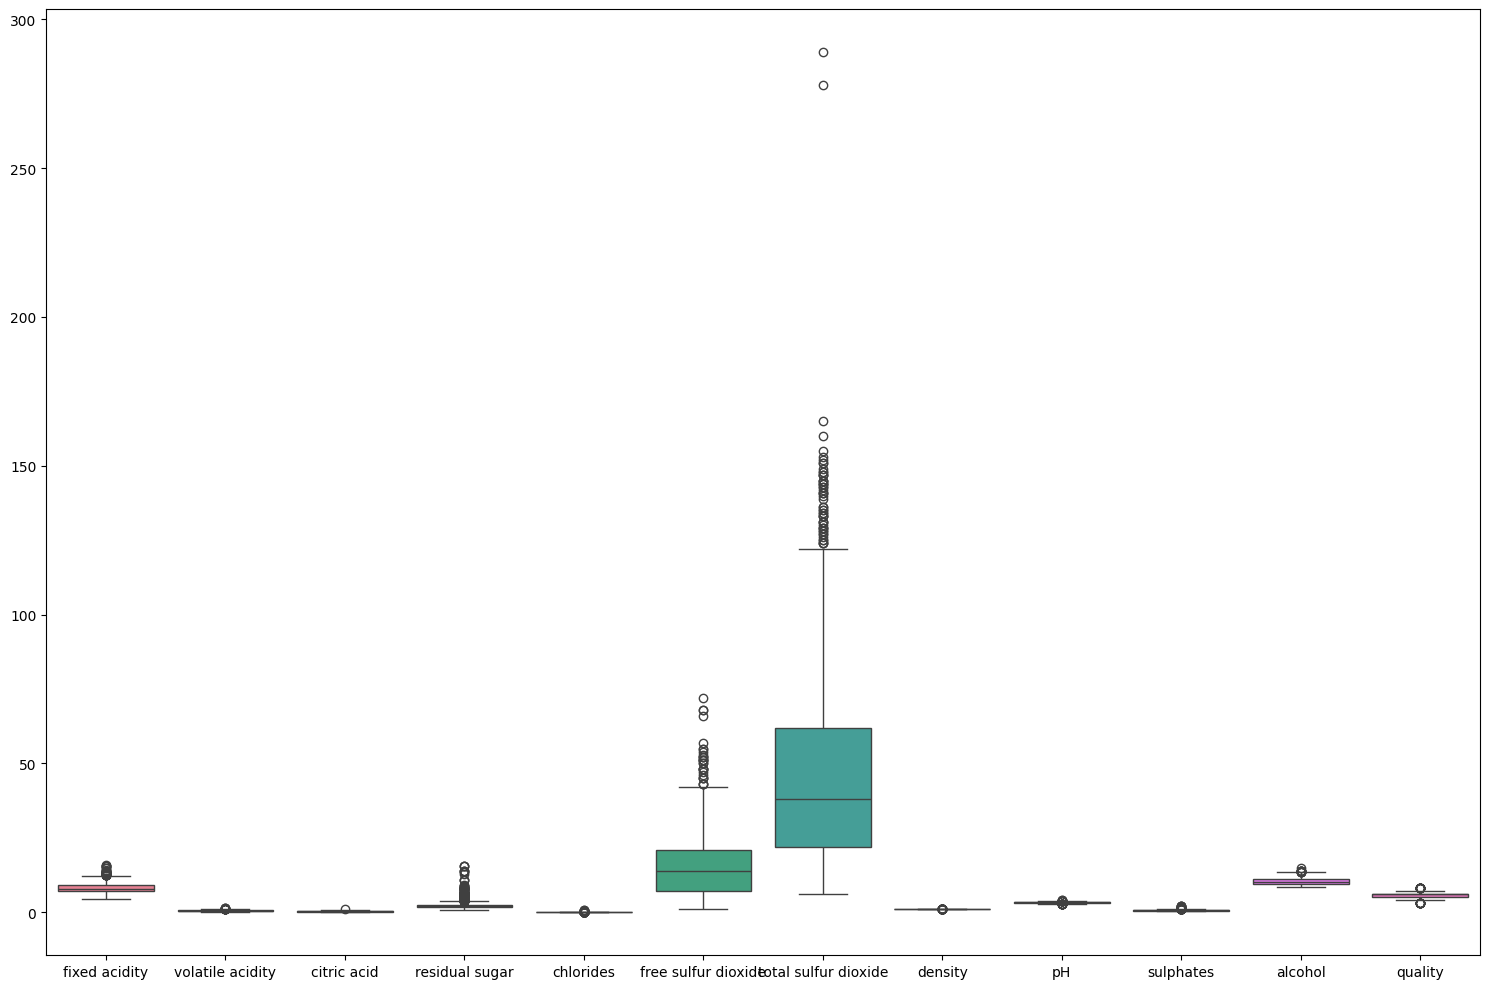

In [50]:
#2.3 
import seaborn as sns
# Vẽ boxplot cho tất cả các cột
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [ ]:
#Nhận xét:

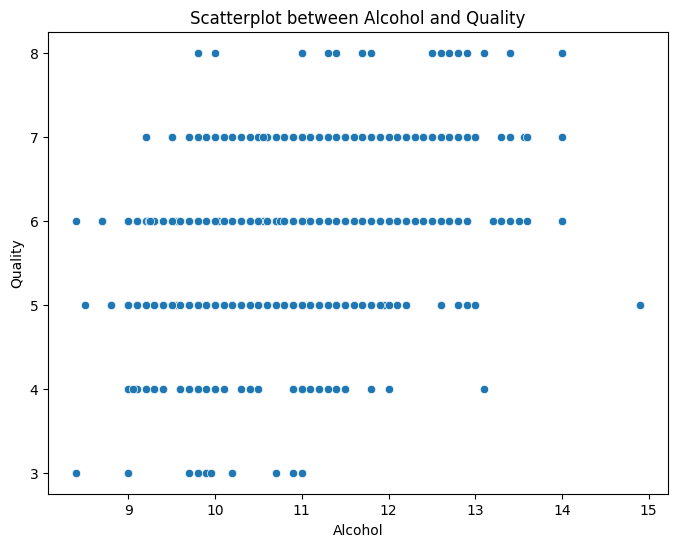

In [49]:
#2.4 Vẽ scatterplot giữa "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='quality')
plt.title('Scatterplot between Alcohol and Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()


In [ ]:
#Nhận xét

In [61]:
#Câu 3:
# Tính toán ma trận tương quan
corr = df.corr()

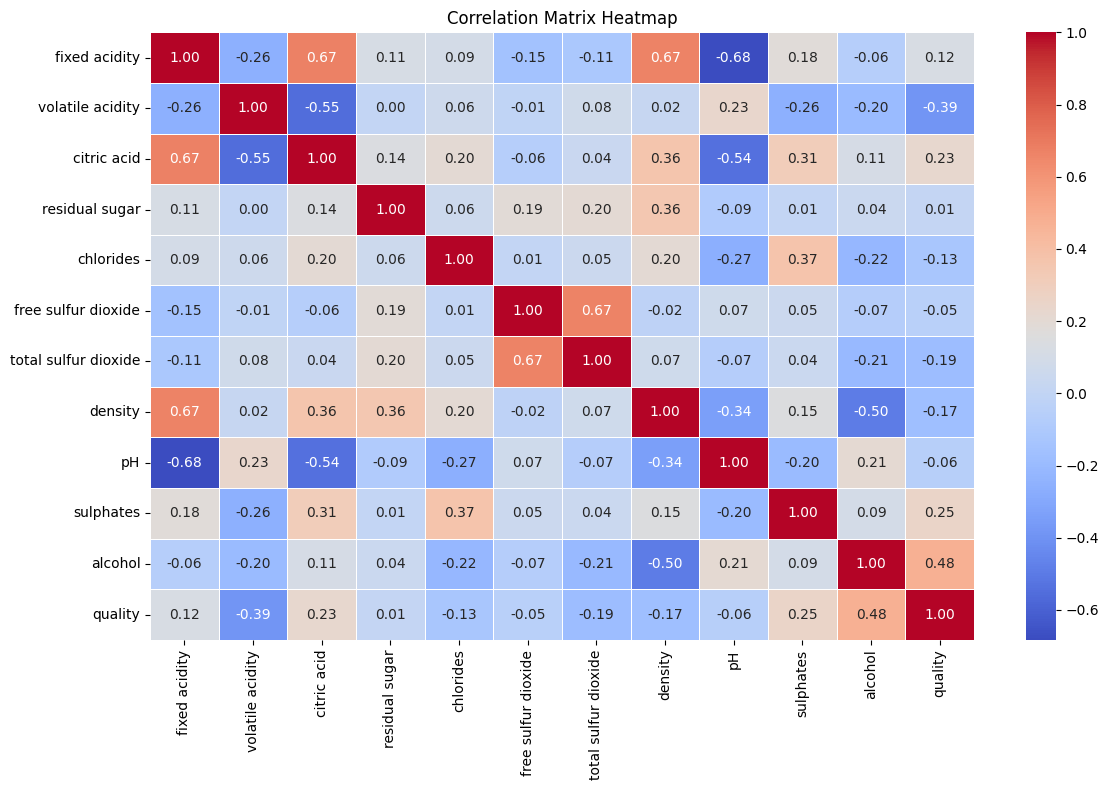

In [62]:
# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [65]:
#Câu 4
#4.1
# Tạo một mảng các chỉ số ngẫu nhiên để xào trộn dữ liệu
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df))
shuffled_indices = df.iloc[shuffled_indices]

In [54]:
# 4.2: Chia dữ liệu với 80% huấn luyện
train_size = int(0.8 * len(df))  # 80% huấn luyện

In [55]:
# 4.3: Tách dữ liệu thành tập huấn luyện và tập kiểm tra
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

train_data = df.iloc[train_indices]
test_data = df.iloc[test_indices]

In [56]:
# 4.4: Tách đặc trưng và nhãn
# Chia tập huấn luyện và tập kiểm tra thành đặc trưng (X) và nhãn (y)
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

X_test = test_data.drop(columns=['quality'])
y_test = test_data['quality']

In [57]:
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (1279, 11), Testing data shape: (320, 11)


In [66]:
from sklearn.preprocessing import StandardScaler
#Câu 5
#5.1:
scaler = StandardScaler()

In [67]:
#5.2: chuẩn hóa huyến luyện
X_train_scaled = scaler.fit_transform(X_train)


In [68]:
#5.3: chuẩn hóa kiểm tra
X_test_scaled = scaler.transform(X_test)

In [69]:
#Câu 6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [71]:
#6.1 Khởi tạo
model = LinearRegression()
model


LinearRegression()

In [73]:
#6.2 Huẩn luyện
model.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
#6.3: dự đoán trên tập kiểm tra
y_pred = model.predict(X_train_scaled)

In [78]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán MSE và R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Hiển thị kết quả
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.43627500001430164
R-squared (R²): 0.3033098371676052


In [ ]:
#1.hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác


In [ ]:
#2 cho bộ dữ liệu howlongwelive:
#2.1 tôi muốn biets có bao nhiêu cột và bao nhiêu hàng
#2.2 tôi muốn biết danh sách tên của các cột 
#2.3 Thử dùng df["status"]
#2.4 cho tôi biết có bao nhiêu nước đang phát triển và nhiêu nước phát triển
#2.5 tính min, max, mean, median của alcohol
#2.6
#2.6.1: đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
#2.6.2: lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP mức trung bình 


In [2]:
import pandas as pd

df = pd.read_csv("howlongwelive.csv")
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# 2.1: Số hàng và số cột
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

Số hàng: 2938, Số cột: 22


In [4]:
# 2.2: Danh sách tên các cột
column_names = df.columns.tolist()
print("Danh sách tên các cột:", column_names)


Danh sách tên các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
# 2.3: Thử dùng df["Status"]
status_series = df["Status"]
print("Dữ liệu cột Status:")
print(status_series.head())


Dữ liệu cột Status:
0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object


In [6]:
# 2.4: Đếm số nước đang phát triển và phát triển
status_counts = df["Status"].value_counts()
print("Số lượng nước phát triển và đang phát triển:")
print(status_counts)


Số lượng nước phát triển và đang phát triển:
Status
Developing    2426
Developed      512
Name: count, dtype: int64


In [7]:
# 2.5: Tính toán thống kê cho Alcohol
alcohol_stats = {
    "Min": df["Alcohol"].min(),
    "Max": df["Alcohol"].max(),
    "Mean": df["Alcohol"].mean(),
    "Median": df["Alcohol"].median()
}
print("Thống kê Alcohol:")
print(alcohol_stats)

Thống kê Alcohol:
{'Min': np.float64(0.01), 'Max': np.float64(17.87), 'Mean': np.float64(4.602860787172012), 'Median': np.float64(3.755)}


In [8]:
# 2.6.1: Đếm số hàng có mức tiêu thụ rượu lớn hơn trung bình và liệt kê các quốc gia độc đáo
alcohol_mean = df["Alcohol"].mean()
high_alcohol_countries = df[df["Alcohol"] > alcohol_mean]["Country"].unique()
print(f"Số quốc gia tiêu thụ rượu nhiều hơn trung bình: {len(high_alcohol_countries)}")
print("Danh sách quốc gia tiêu thụ rượu nhiều hơn trung bình:")
print(high_alcohol_countries)

Số quốc gia tiêu thụ rượu nhiều hơn trung bình: 92
Danh sách quốc gia tiêu thụ rượu nhiều hơn trung bình:
['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Greece' 'Grenada' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Kazakhstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Mongolia'
 'Montenegro' 'Namibia' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'Rwanda' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines'

In [9]:
# 2.6.2: Lấy danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
schooling_mean = df["Schooling"].mean()
gdp_mean = df["GDP"].mean()
high_edu_high_gdp_countries = df[(df["Schooling"] > schooling_mean) & (df["GDP"] > gdp_mean)]["Country"].unique()
print("Danh sách quốc gia có học vấn và GDP cao hơn trung bình:")
print(high_edu_high_gdp_countries)


Danh sách quốc gia có học vấn và GDP cao hơn trung bình:
['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Gabon' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Mauritius'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovenia' 'South Africa' 'Spain' 'Suriname'
 'Sweden' 'Switzerland' 'Trinidad and Tobago' 'Turkey'
 'United Arab Emirates' 'Uruguay']
